In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Amritsar.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,La Roma Pizzeria,500,"Fast Food,Italian",Amritsar,Ranjit Avenue,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.9,2763
1,Bade Bhai ka Brothers Dhaba,500,North Indian,Amritsar,Town Hall,Casual Dining,8am to 1130pm(Mon-Sun),Very Good,4.4,1008
2,Bharawan Da Dhaba,500,"North Indian,Fast Food",Amritsar,Town Hall,Casual Dining,7am to 12midnight(Mon-Sun),Very Good,4.3,989
3,R K Food Plaza,400,"North Indian,Chinese,Fast Food",Amritsar,Town Hall,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.2,508
4,Makhan Fish and Chicken Corner,700,"North Indian,Chinese",Amritsar,Basant Nagar,Casual Dining,12noon to 11pm(Mon-Sun),Very Good,4.0,868


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
Name                417 non-null object
Price               417 non-null int64
Cuisine_Category    417 non-null object
City                417 non-null object
Region              417 non-null object
Cuisine_Type        417 non-null object
Timing              417 non-null object
Rating_Types        417 non-null object
Rating              417 non-null float64
Votes               417 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.7+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,417.000000,417.000000,417.000000
mean,444.628297,3.486091,91.064748
std,274.425831,0.426410,190.141592
min,100.000000,2.400000,4.000000
25%,300.000000,3.200000,12.000000
50%,400.000000,3.500000,36.000000
75%,500.000000,3.800000,99.000000
max,2000.000000,4.900000,2763.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Pizza Italia         2
Bharawan Da Dhaba    2
Chawlas 2            2
Fun Tym Pizzaria     2
Italian Pizza        2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Ranjit Avenue    135
Lawrence Road     46
Basant Nagar      30
INA Colony        29
Town Hall         27
GT Road           27
Rani Ka Bagh      20
White Avenue      18
Hathi Gate        17
Mohan Nagar       11
Name: Region, dtype: int64

Text(0.5,1,'Region')

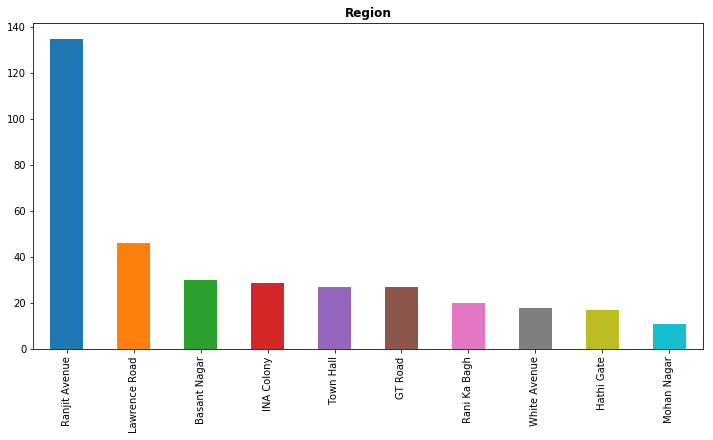

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

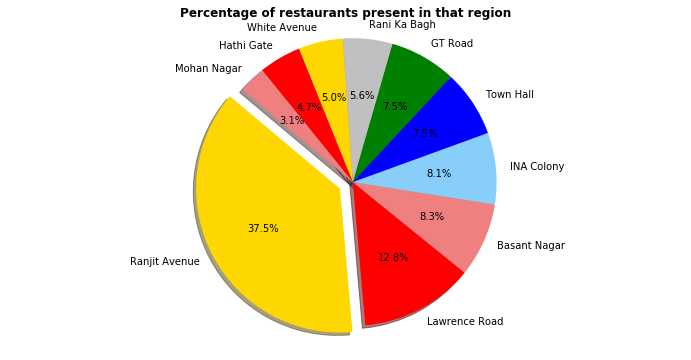

In [11]:
plt.figure(figsize = (12,6))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      195
Good         157
Very Good     58
Excellent      4
Poor           2
Média          1
Name: Rating_Types, dtype: int64

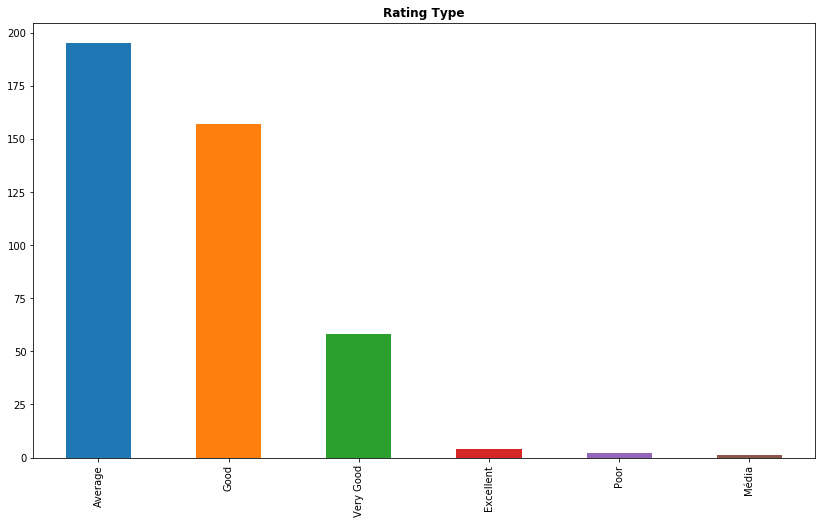

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       228
Casual Dining      89
Bakery             18
Café               16
Dhaba              15
Beverage Shop      11
Dessert Parlor      9
Sweet Shop          7
Lounge              7
none                5
Name: Cuisine_Type, dtype: int64

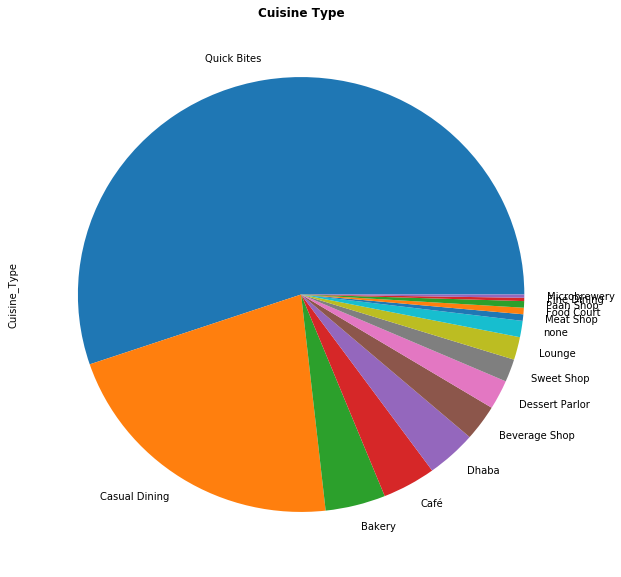

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [ ]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.486091127098322


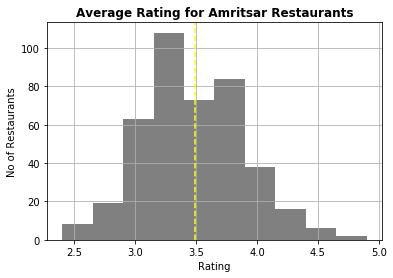

In [18]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Amritsar Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [ ]:
#Average rating per restaurant in Ajmer is found to be around 3.4

# Top cuisines in Amritsar

In [19]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

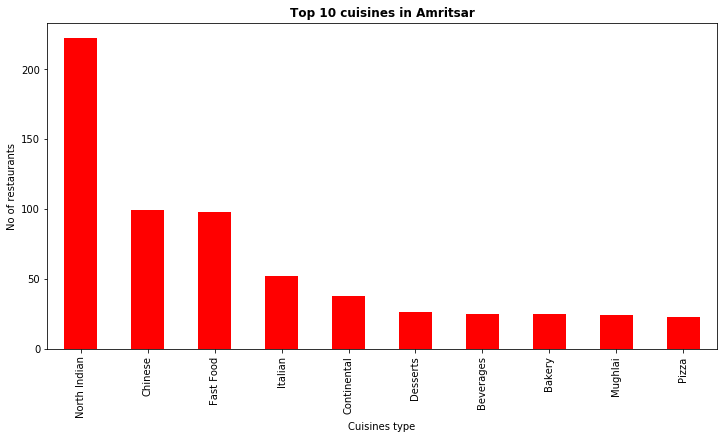

In [20]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Amritsar',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [21]:
data['Price'].value_counts()[:20]

300     83
400     69
500     59
200     34
600     29
150     20
350     20
250     16
700     16
100     15
800     13
1000    11
450      8
1200     7
1400     5
900      5
180      2
2000     2
650      1
1500     1
Name: Price, dtype: int64

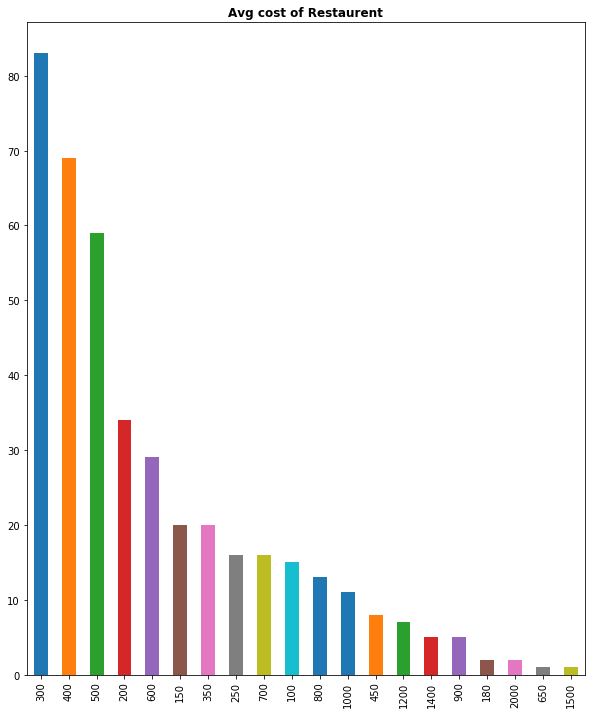

In [22]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [23]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

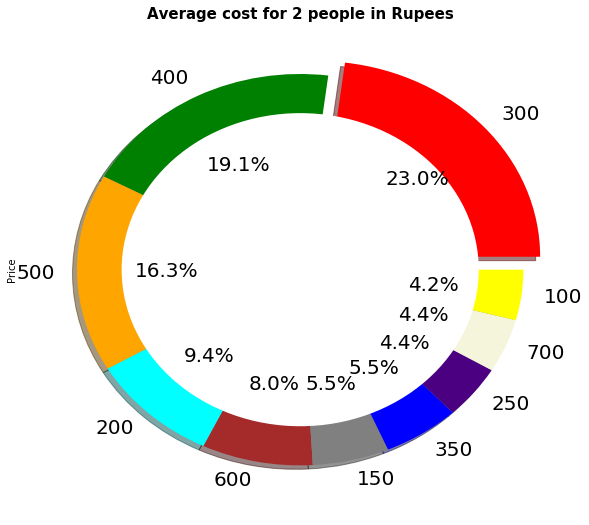

In [24]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300